# Bin profiles

## Import packages

In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

## Import fetch data notebook

In [2]:
# fetch_data_notebook = 'lmm_fetch_data.ipynb'

# %run {fetch_data_notebook}

# plot_data_notebook = 'lmm_plot_data.ipynb'

# %run {plot_data_notebook}

fetch_data_notebook = 'fetch_argo.ipynb'

%run {fetch_data_notebook}

## Import data binning notebook

In [3]:
data_binner_notebook = 'lmm_data_binner.ipynb'

%run {data_binner_notebook}

## Retrieve data from Argovis

In [4]:
# start_date = '2020-1-01'
# end_date = '2020-01-03'
# pressure_range = '[0,500]'
# region = 'atlantic_coords'
# argo_source = 'argo_core'

# fetch_obj = ArgovisDataImporter(start_date, end_date, pressure_range, source=argo_source, region=region)

# df = fetch_obj.get_cleaned_profile()

# len(df)

In [5]:
atlantic_coords = [[-40.078125,29.840644],[-33.368671,30.338837],[-26.614528,30.492027],
                    [-19.863281,30.297018],[-20.039063,-30.145127],[-26.724822,-30.384017],
                    [-33.419918,-30.281826],[-40.078125,-29.840644],[-40.078125,29.840644]]
presRange ='[0,500]'
shape = str(atlantic_coords)
URL_PREFIX = 'https://argovis-api.colorado.edu'
startDate = '2021-04-20T00:00:00Z'
endDate   = '2021-05-02T00:00:00Z'


In [6]:
df = get_data_for_timeRange(startDate=startDate,endDate=endDate, \
                                url_prefix=URL_PREFIX+'/profiles?', \
                                myAPIkey='', \
                                source='argo_core', \
                                polygon=shape, data='psal,temp,psal_argoqc,pres_argoqc,temp_argoqc', \
                                dt_tag='365d',writeFlag=True)

Number of items: 309
https://argovis-api.colorado.edu/profiles?&startDate=2021-04-20T00:00:00Z&endDate=2021-05-02T23:59:59Z&polygon=[[-40.078125, 29.840644], [-33.368671, 30.338837], [-26.614528, 30.492027], [-19.863281, 30.297018], [-20.039063, -30.145127], [-26.724822, -30.384017], [-33.419918, -30.281826], [-40.078125, -29.840644], [-40.078125, 29.840644]]&data=psal,temp,psal_argoqc,pres_argoqc,temp_argoqc&source=argo_core


In [7]:
print(df.columns)

profile_vars = ['_id', 'geolocation', 'instrument', 'timestamp', 'source_info', 'platform_type', 'data']

df_subset = df[profile_vars]
df_subset.head()

Index(['_id', 'cycle_number', 'basin', 'data_type', 'geolocation',
       'instrument', 'timestamp', 'date_updated_argovis', 'fleetmonitoring',
       'oceanops', 'profile_direction', 'platform_id', 'data_center',
       'pi_name', 'geolocation_argoqc', 'timestamp_argoqc', 'platform_type',
       'positioning_system', 'vertical_sampling_scheme', 'wmo_inst_type',
       'source_info', 'data_keys', 'data_keys_mode', 'data', 'data_warning'],
      dtype='object')


,_id,geolocation,instrument,timestamp,source_info,platform_type,data
0,3901237_157,"{'type': 'Point', 'coordinates': [-28.68579, -...",profiling_float,2021-05-02T21:31:23.002Z,"[{'source': ['argo_core'], 'source_url': 'ftp:...",S2A,"[{'pres': 1.12, 'pres_argoqc': 1, 'psal': 37.2..."
1,7900500_160,"{'type': 'Point', 'coordinates': [-21.84100000...",profiling_float,2021-05-02T20:36:20.000Z,"[{'source': ['argo_core'], 'source_url': 'ftp:...",APEX,"[{'pres': 5.1, 'pres_argoqc': 1, 'psal': 36.30..."
2,3901537_130,"{'type': 'Point', 'coordinates': [-34.3002, -2...",profiling_float,2021-05-02T19:18:07.000Z,"[{'source': ['argo_core'], 'source_url': 'ftp:...",APEX,"[{'pres': 3.2, 'pres_argoqc': 1, 'psal': 37.31..."
3,3902207_065D,"{'type': 'Point', 'coordinates': [-23.18054, -...",profiling_float,2021-05-02T18:24:24.001Z,"[{'source': ['argo_core', 'argo_deep'], 'sourc...",SOLO_D_MRV,"[{'pres': 0.6, 'pres_argoqc': 1, 'psal': 36.25..."
4,3902398_056,"{'type': 'Point', 'coordinates': [-24.3388, -2...",profiling_float,2021-05-02T17:36:28.000Z,"[{'source': ['argo_core'], 'source_url': 'ftp:...",APEX,"[{'pres': 5.5, 'pres_argoqc': 1, 'psal': 37.15..."


In [8]:
df_subset = expand_lon_lat(df_subset)

print(df_subset.columns)

Index(['_id', 'instrument', 'timestamp', 'source_info', 'platform_type',
       'data', 'lon', 'lat'],
      dtype='object')


In [9]:
df_subset = expand_source_info(df_subset)

print(df_subset.columns)



Index(['_id', 'instrument', 'timestamp', 'platform_type', 'data', 'lon', 'lat',
       'source'],
      dtype='object')


In [10]:
print(df_subset.columns)

parsed_df = lmm_parse_df(df_subset)

Index(['_id', 'instrument', 'timestamp', 'platform_type', 'data', 'lon', 'lat',
       'source'],
      dtype='object')


In [11]:
parsed_df.head()

,pres,pres_argoqc,psal,psal_argoqc,temp,temp_argoqc,profile_id,instrument,timestamp,platform_type,lon,lat,source
0,1.12,1,37.294998,1.0,26.806999,1.0,3901237_157,profiling_float,2021-05-02T21:31:23.002Z,S2A,-28.68579,-20.5408,argo_core
1,2.04,1,37.293999,1.0,26.806,1.0,3901237_157,profiling_float,2021-05-02T21:31:23.002Z,S2A,-28.68579,-20.5408,argo_core
2,3.00,1,37.293999,1.0,26.809,1.0,3901237_157,profiling_float,2021-05-02T21:31:23.002Z,S2A,-28.68579,-20.5408,argo_core
3,3.96,1,37.293999,1.0,26.808001,1.0,3901237_157,profiling_float,2021-05-02T21:31:23.002Z,S2A,-28.68579,-20.5408,"argo_core,argo_deep"
4,4.96,1,37.293999,1.0,26.808001,1.0,3901237_157,profiling_float,2021-05-02T21:31:23.002Z,S2A,-28.68579,-20.5408,argo_core


In [12]:
# Filter to get argo_core

# This takes too long

# df = parsed_df.loc[parsed_df['source'].str.contains("['argo_core']")]

# print(df)

#df = parsed_df.loc[parsed_df['source'].isin(['argo_core'])]

#df = parsed_df.loc[parsed_df['source'].str.contains('argo_core')]

In [13]:
# map column names so argo and goship the same

name_mapping = {}
name_mapping['psal_argoqc'] = 'psal_qc'
name_mapping['temp_argoqc'] = 'temp_qc'
name_mapping['pres_argoqc'] = 'pres_qc'

df = parsed_df.rename(columns=name_mapping)

print(df.columns)


Index(['pres', 'pres_qc', 'psal', 'psal_qc', 'temp', 'temp_qc', 'profile_id',
       'instrument', 'timestamp', 'platform_type', 'lon', 'lat', 'source'],
      dtype='object')


In [14]:
class ShowProgressContextManager:
    def __init__(self, out, command=''):
        self.out = out
        self.command = command
        
    def __enter__(self):
        css_style = "<style>span.start { margin:0; padding: 0; color: blue; }</style>"
        html_str = f'<span class="start">Running {self.command}...</span>'
       
        with self.out:
            display(HTML(css_style))
            display(HTML(html_str))
        
    def __exit__(self, exc_type, exc_value, exc_tb):
        
        css_style = "<style>span.end { margin: 0; padding: 0; color: green; }</style>"
        html_str = '<span class="end">Finished</span>'
        
        with self.out:
            display(HTML(css_style)) 
            display(HTML(html_str))

## Create xarray dataset binned on pressure


In [15]:
pressure_range = [0,500]
pressure_bin_size = .1

binner_obj = DataBinner(df, pressure_range, pressure_bin_size)

out = widgets.Output()

message = 'Create xarray dataset'

with ShowProgressContextManager(out, message):
    
    ds_all = binner_obj.create_xarray()

display(out)


Output()

### Look at dataset created

In [16]:
print(ds_all)
print(list(ds_all.coords))
print(list(ds_all.keys()))


<xarray.Dataset>
Dimensions:        (pres: 64832)
Coordinates:
  * pres           (pres) float64 1.15 1.95 3.05 3.95 ... 437.8 462.8 487.8
    profile_id     (pres) <U12 '1901689_287' '1901689_287' ... '7900545_051'
    instrument     (pres) <U15 'profiling_float' ... 'profiling_float'
    timestamp      (pres) <U24 '2021-04-26T05:25:43.000Z' ... '2021-04-23T05:...
    platform_type  (pres) <U10 'S2A' 'S2A' 'S2A' ... 'ARVOR' 'ARVOR' 'ARVOR'
    lon            (pres) float64 -26.6 -26.6 -26.6 ... -23.12 -23.12 -23.12
    lat            (pres) float64 5.886 5.886 5.886 5.886 ... 16.8 16.8 16.8
Data variables:
    temp           (pres) float64 28.33 28.33 28.33 28.33 ... 10.35 9.992 9.728
    psal           (pres) float64 35.24 35.24 35.24 35.24 ... 35.22 35.18 35.16
['pres', 'profile_id', 'instrument', 'timestamp', 'platform_type', 'lon', 'lat']
['temp', 'psal']


## Save dataset to netcdf

Since limited on the number of data to download, consider saving to files and then combining when reading them all in

In [17]:
ds_all.to_netcdf('temp_psal_dataset.nc')

## Example queries

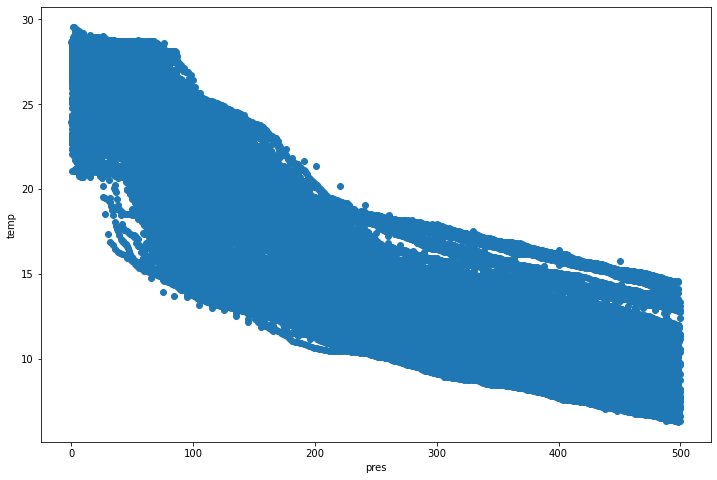

In [18]:
xr.plot.scatter(ds_all,'pres', 'temp', size=8)

# TODO

Can't bin on time yet since only have the timestamp variable

### Select all values where day = 2

In [19]:
a = ds_all.where(ds_all.day == 2, drop=True)
print(a)

AttributeError: 'Dataset' object has no attribute 'day'

In [ ]:
xr.plot.scatter(a,'pres', 'temp', size=8)

In [ ]:
ds_all_grouped = binner_obj.bin_on_time(ds_all, 'day')

In [ ]:

for name, group in ds_all_grouped:
    pres = group['pres'].values
    temp = group['temp'].data
    psal = group['psal'].data
    plt.plot(pres,temp)
